In [1]:
import os 
from pathlib import Path

import json
from pandas.io.json import json_normalize
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import requests
#from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects

In [2]:
reserves = {'0xEeeeeEeeeEeEeeEeEeEeeEEEeeeeEeeeeeeeEEeE': 'ETH',
 '0x6B175474E89094C44Da98b954EedeAC495271d0F': 'DAI',
 '0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48': 'USDC',
 '0x57Ab1ec28D129707052df4dF418D58a2D46d5f51': 'SUSD',
 '0x0000000000085d4780B73119b644AE5ecd22b376': 'TUSD',
 '0xdAC17F958D2ee523a2206206994597C13D831ec7': 'USDT',
 '0x4Fabb145d64652a948d72533023f6E7A623C7C53': 'BUSD',
 '0x0D8775F648430679A709E98d2b0Cb6250d2887EF': 'BAT',
 '0xdd974D5C2e2928deA5F71b9825b8b646686BD200': 'KNC',
 '0x80fB784B7eD66730e8b1DBd9820aFD29931aab03': 'LEND',
 '0x514910771AF9Ca656af840dff83E8264EcF986CA': 'LINK',
 '0x0F5D2fB29fb7d3CFeE444a200298f468908cC942': 'MANA',
 '0x9f8F72aA9304c8B593d555F12eF6589cC3A579A2': 'MKR',
 '0x1985365e9f78359a9B6AD760e32412f4a445E862': 'REP',
 '0xC011a73ee8576Fb46F5E1c5751cA3B9Fe0af2a6F': 'SNX',
 '0x2260FAC5E5542a773Aa44fBCfeDf7C193bc2C599': 'WBTC',
 '0xE41d2489571d322189246DaFA5ebDe1F4699F498': 'ZRX'}

def get_coinmarketcap_prices(markets):
    
    symbols='{},{},{},{},{},{},{}'.format(markets[0],markets[1],markets[2],markets[3],markets[4],markets[5],markets[6])
    
    print(symbols)
    
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/quotes/latest'
    parameters = {
      'symbol': symbols
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '337ea3d2-3e82-42c0-8172-94f82876bcb6',
    }

    session = requests.Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data['data'])
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    prices={}
    for m in markets:
        price_usd = data['data'][m]['quote']['USD']['price']
        prices[m] = price_usd
    
    return prices


In [12]:
file = Path('../javascript/aave_flashloans_history.json')

with open(file) as f:
    data = json.load(f)
    
data

[{'address': '0x398eC7346DcD622eDc5ae82352F02bE94C62d119',
  'blockHash': '0x83e51a671e7c9329f911053743c79e714b1322ffa60fe32edad2a59a1697948e',
  'blockNumber': 9301534,
  'logIndex': 75,
  'removed': False,
  'transactionHash': '0xc47ed2ebce6a23c961e0d9f7e40444412a8a836bc53d5c72611e5d644940a9da',
  'transactionIndex': 55,
  'id': 'log_5cab8ca8',
  'returnValues': {'0': '0x594f7F38c97a1847b60001498316b78a23979dc2',
   '1': '0x6B175474E89094C44Da98b954EedeAC495271d0F',
   '2': '33151031858045700000',
   '3': '116028611503159950',
   '4': '34808583450947985',
   '5': '1579301111',
   '_target': '0x594f7F38c97a1847b60001498316b78a23979dc2',
   '_reserve': '0x6B175474E89094C44Da98b954EedeAC495271d0F',
   '_amount': '33151031858045700000',
   '_totalFee': '116028611503159950',
   '_protocolFee': '34808583450947985',
   '_timestamp': '1579301111'},
  'event': 'FlashLoan',
  'signature': '0x5b8f46461c1dd69fb968f1a003acee221ea3e19540e350233b612ddb43433b55',
  'raw': {'data': '0x000000000000000

In [11]:
df = json_normalize(data).loc[:,['returnValues._timestamp','returnValues._reserve','returnValues._amount', 'returnValues._protocolFee']]
df.columns=['timestamp','reserve','amount','protocolFee']
df['reserve'].replace(reserves, inplace=True)
for column in ['amount', 'protocolFee']:
    df[column] = df[column].str.rstrip('%').astype('float64')

df['date'] = pd.to_datetime(df['timestamp'], unit='s').dt.date
df.drop(columns=['timestamp'],inplace=True)



     returnValues._timestamp                       returnValues._reserve  \
0                 1579301111  0x6B175474E89094C44Da98b954EedeAC495271d0F   
1                 1579301577  0x6B175474E89094C44Da98b954EedeAC495271d0F   
2                 1579366081  0x6B175474E89094C44Da98b954EedeAC495271d0F   
3                 1579433627  0x6B175474E89094C44Da98b954EedeAC495271d0F   
4                 1579435508  0x6B175474E89094C44Da98b954EedeAC495271d0F   
5                 1579521467  0x6B175474E89094C44Da98b954EedeAC495271d0F   
6                 1580838329  0x6B175474E89094C44Da98b954EedeAC495271d0F   
7                 1580839360  0x6B175474E89094C44Da98b954EedeAC495271d0F   
8                 1580993211  0x6B175474E89094C44Da98b954EedeAC495271d0F   
9                 1580996861  0x6B175474E89094C44Da98b954EedeAC495271d0F   
10                1581011364  0x6B175474E89094C44Da98b954EedeAC495271d0F   
11                1581041718  0x6B175474E89094C44Da98b954EedeAC495271d0F   
12          

In [6]:
assets =['ETH','BAT','MKR','DAI','USDC','WBTC','ZRX']
scale_factors = {'ETH':1/10**18,'BAT':1/10**18,'MKR':1/10**18,'DAI':1/10**18,'SAI':1/10**18,'USDC':1/10**6,'REP':1/10**18,'WBTC':1/10**8,'ZRX':1/10**18}

prices = get_coinmarketcap_prices(assets)

print(prices)
for index, row in df.iterrows():
    scaled_amount = row['amount'] * scale_factors[row['reserve']]
    df.loc[index,'scaled_amount']=scaled_amount
    amount_usd = scaled_amount * prices[row['reserve']]
    df.loc[index,'amount_usd']= amount_usd
    
pd.options.display.float_format = '{:20,.2f}'.format

summary = df.loc[:,['reserve','amount_usd']].groupby('reserve').agg(['sum','count','mean']).reset_index(level='reserve')
summary

ETH,BAT,MKR,DAI,USDC,WBTC,ZRX
{'ETH': 194.322661955, 'BAT': 0.179197401337, 'MKR': 337.709592908, 'DAI': 1.00200016209, 'USDC': 1.00149477634, 'WBTC': 7732.08507864, 'ZRX': 0.204047962591}


reserve           amount_usd                           
                           sum count                 mean
0     BAT             4,870.49    21               231.93
1     DAI           969,854.99  1022               948.98
2     ETH         3,112,899.46   593             5,249.41
3     MKR             1,688.55     1             1,688.55
4    USDC           304,693.12   194             1,570.58
5    WBTC               401.54     8                50.19
6     ZRX               241.50     8                30.19

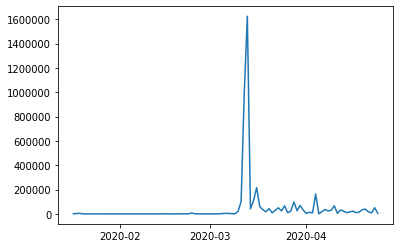

DAILY MIN sum                   6.80
dtype: float64, MAX sum           1,624,785.36
dtype: float64, MEAN sum              56,341.66
dtype: float64 in USD
TRANSACTION MIN 1.0020001620900001e-14, MAX 416607.3013236171, MEAN 2379.3446918382133 in USD


In [8]:

ts = df.loc[:,['date','amount_usd']].groupby('date').agg(['sum']).reset_index(level='date')

ts = ts.iloc[-90:,]

plt.plot(ts['date'],ts['amount_usd'])
months = mdates.MonthLocator() 
ax = plt.gca()
ax.xaxis.set_major_locator(months)
plt.show()

print("DAILY MIN {}, MAX {}, MEAN {} in USD".format(ts['amount_usd'].min(), ts['amount_usd'].max(), ts['amount_usd'].mean()))
print("TRANSACTION MIN {}, MAX {}, MEAN {} in USD".format(df['amount_usd'].min(), df['amount_usd'].max(), df['amount_usd'].mean()))

In [9]:
time_series['date'] = pd.to_datetime(time_series['timestamp'], unit='s')
time_series

NameError: name 'time_series' is not defined

In [212]:
#time_series

w = 
w

0      2020-01-17 22:45:11
1      2020-01-17 22:52:57
2      2020-01-18 16:48:01
3      2020-01-19 11:33:47
4      2020-01-19 12:05:08
5      2020-01-20 11:57:47
6      2020-02-04 17:45:29
7      2020-02-04 18:02:40
8      2020-02-06 12:46:51
9      2020-02-06 13:47:41
10     2020-02-06 17:49:24
11     2020-02-07 02:15:18
12     2020-02-07 02:19:15
13     2020-02-12 17:14:54
14     2020-02-13 06:43:41
15     2020-02-14 16:21:30
16     2020-02-15 00:11:53
17     2020-02-15 01:23:35
18     2020-02-16 00:14:44
19     2020-02-16 11:02:27
20     2020-02-16 11:30:46
21     2020-02-16 11:59:03
22     2020-02-16 12:17:17
23     2020-02-16 13:21:52
24     2020-02-16 13:24:56
25     2020-02-16 13:35:15
26     2020-02-16 13:45:39
27     2020-02-16 14:39:42
28     2020-02-16 14:42:19
29     2020-02-16 14:52:42
               ...        
1809   2020-04-22 20:04:29
1810   2020-04-22 20:06:36
1811   2020-04-22 22:45:28
1812   2020-04-23 03:24:07
1813   2020-04-23 06:19:27
1814   2020-04-23 06:36:57
1